**Imports**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



**Load Dataset**

In [56]:
df = pd.read_csv("customer_churn_dataset.csv")

**Basic Cleaning**

In [57]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['CustomerID'], errors='ignore', inplace=True)

print(f"Dataset Shape: {df.shape}")

Dataset Shape: (440832, 11)


**Train-Test Split**

In [60]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Preprocessing**

**One Hot Encoding**

In [61]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


**Scaling**

In [62]:
scaler = StandardScaler()
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(X_train.columns.tolist())
X_train.head()

['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Male', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly']


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
318331,0.210377,0.855271,1.651238,-0.197156,-1.085320,1.300956,-0.753449,True,False,True,False,False
429062,-0.512784,0.681455,0.137056,-0.848223,0.246158,1.478368,-0.288211,False,False,True,False,False
60074,-1.075242,-1.056712,1.651238,0.128377,-0.116972,0.698312,-1.102379,False,True,False,False,True
12759,-0.834189,-1.288467,0.835909,2.081578,1.335549,-2.130477,0.525957,False,False,False,False,True
357321,-0.111028,-1.230528,0.486483,-1.173756,-1.569494,0.195568,0.409648,True,False,False,False,False


**Evaluation Function**

In [63]:

results = []

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append([name, acc, prec, rec, f1])

    print(f"\n===== {name} =====")
    print("Accuracy :", round(acc,4))
    print("Precision:", round(prec,4))
    print("Recall   :", round(rec,4))
    print("F1 Score :", round(f1,4))


    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

**Train Models**

**Logistic Regression**


===== Logistic Regression =====
Accuracy : 0.8934
Precision: 0.9234
Recall   : 0.8854
F1 Score : 0.904


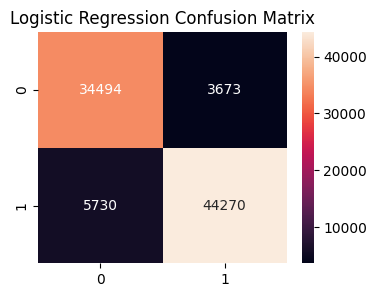

In [64]:
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, "Logistic Regression")

**Decision Tree**


===== Decision Tree =====
Accuracy : 0.9973
Precision: 1.0
Recall   : 0.9952
F1 Score : 0.9976


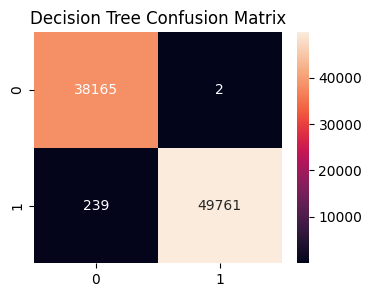

In [65]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
evaluate_model(dt, "Decision Tree")

**Random Forest**


===== Random Forest =====
Accuracy : 0.9944
Precision: 0.9999
Recall   : 0.9902
F1 Score : 0.995


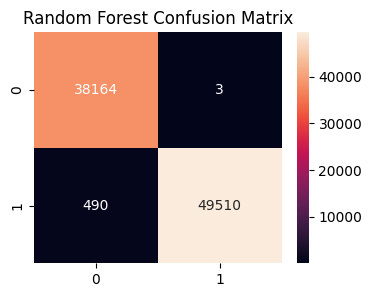

In [69]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    random_state=42
)
evaluate_model(rf, "Random Forest")

**Model Comparison**

,Model,Accuracy,Precision,Recall,F1
1,Decision Tree,0.997267,0.999960,0.99522,0.997584
2,Random Forest,0.994408,0.999939,0.99020,0.995046
3,Random Forest,0.994408,0.999939,0.99020,0.995046
0,Logistic Regression,0.893350,0.923388,0.88540,0.903995


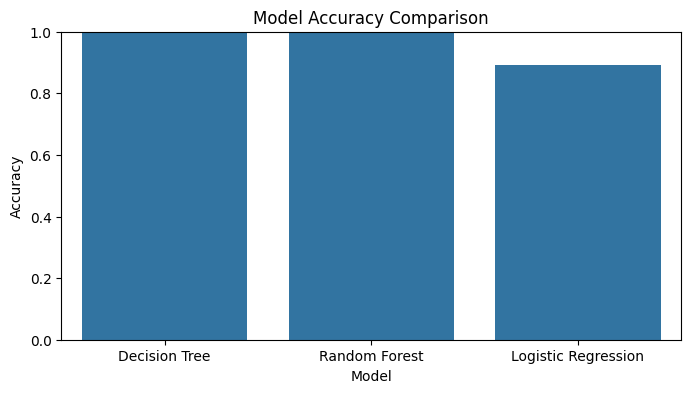

In [70]:
comparison_df = pd.DataFrame(
    results,
    columns=['Model','Accuracy','Precision','Recall','F1']
)

comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
display(comparison_df)

plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

## Model Comparison

All trained models were compared to identify the best-performing approach. The Random Forest model demonstrated superior predictive performance due to its ability to capture complex non-linear relationships in the data.

**Feature Importance**

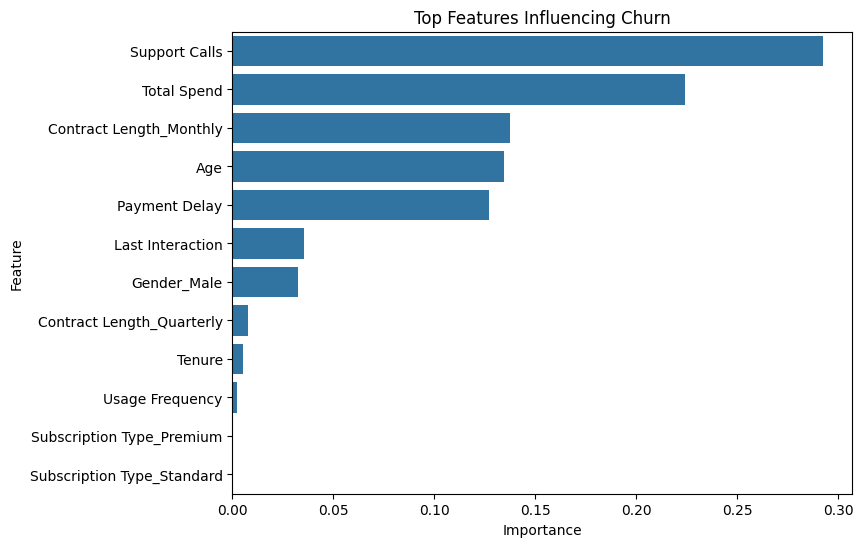

In [71]:
importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top Features Influencing Churn")
plt.show()

##  Feature Importance Analysis

Random Forest feature importance was used to identify the key drivers of customer churn. This analysis helps translate model predictions into actionable business insights for customer retention strategies.

**Saving Model**

In [72]:
best_model = rf

joblib.dump(best_model, "churn_model_final.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

**Checking data leakage and Overfitting Issue**

In [74]:
print("Baseline accuracy:",
      max(y_test.value_counts(normalize=True)))

Baseline accuracy: 0.5671056064060249


In [75]:
corr = df.corr(numeric_only=True)['Churn'].abs().sort_values(ascending=False)
print(corr.head(10))

Churn               1.000000
Support Calls       0.574267
Total Spend         0.429355
Payment Delay       0.312129
Age                 0.218394
Last Interaction    0.149616
Tenure              0.051919
Usage Frequency     0.046101
Name: Churn, dtype: float64


In [76]:
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Train accuracy:", accuracy_score(y_train, train_preds))
print("Test accuracy :", accuracy_score(y_test, test_preds))

Train accuracy: 0.9944451533324826
Test accuracy : 0.9944083387208366


## Conclusion

The project successfully developed a machine learning pipeline for customer churn prediction. Among the evaluated models, Random Forest achieved the best performance, indicating strong predictive capability.

The analysis revealed that customer support interactions, spending behavior, and payment patterns are significant indicators of churn risk. These insights can help businesses design targeted retention strategies and improve customer lifetime value.